In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mexico-covid19-clinical-data/mexico_covid19.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv('/kaggle/input/mexico-covid19-clinical-data/mexico_covid19.csv')
df.head()

,id,FECHA_ARCHIVO,ID_REGISTRO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,DELAY,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,9269,2020-04-12,00011f,25,25,2,0,25,Sinaloa,SL,...,2,2,1,2,2,2,99,MÃ©xico,97,97
1,33333,2020-04-12,00014e,14,14,2,0,14,Jalisco,JC,...,2,2,1,2,1,99,99,MÃ©xico,97,2
2,35483,2020-04-12,000153,8,8,1,0,8,Chihuahua,CH,...,2,2,2,2,2,99,99,MÃ©xico,97,2
3,7062,2020-04-12,0001b6,9,15,1,0,9,Ciudad de Mexico,DF,...,2,2,1,2,2,99,99,MÃ©xico,97,97
4,23745,2020-04-12,0001c1,9,9,2,0,9,Ciudad de Mexico,DF,...,2,2,2,2,2,99,99,MÃ©xico,97,97


In [5]:
df.columns

Index(['id', 'FECHA_ARCHIVO', 'ID_REGISTRO', 'ENTIDAD_UM', 'ENTIDAD_RES',
       'RESULTADO', 'DELAY', 'ENTIDAD_REGISTRO', 'ENTIDAD', 'ABR_ENT',
       'FECHA_ACTUALIZACION', 'ORIGEN', 'SECTOR', 'SEXO', 'ENTIDAD_NAC',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS',
       'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'MIGRANTE',
       'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [6]:
df.info()  # Column types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263007 entries, 0 to 263006
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   263007 non-null  int64  
 1   FECHA_ARCHIVO        263007 non-null  object 
 2   ID_REGISTRO          263007 non-null  object 
 3   ENTIDAD_UM           263007 non-null  int64  
 4   ENTIDAD_RES          263007 non-null  int64  
 5   RESULTADO            263007 non-null  int64  
 6   DELAY                263007 non-null  int64  
 7   ENTIDAD_REGISTRO     263007 non-null  int64  
 8   ENTIDAD              263007 non-null  object 
 9   ABR_ENT              263007 non-null  object 
 10  FECHA_ACTUALIZACION  263007 non-null  object 
 11  ORIGEN               263007 non-null  int64  
 12  SECTOR               263007 non-null  int64  
 13  SEXO                 263007 non-null  int64  
 14  ENTIDAD_NAC          263007 non-null  int64  
 15  MUNICIPIO_RES    

In [7]:
# Drop ID columns and others with too many nulls
df = df.drop(columns=['id', 'ID_REGISTRO', 'FECHA_ARCHIVO', 'FECHA_ACTUALIZACION', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN'])

# Convert nulls (- or 97/98/99) to NaN
df = df.replace([97, 98, 99, '97', '98', '99'], pd.NA)

# Drop rows with missing target or critical data
df = df.dropna(subset=['RESULTADO', 'EDAD', 'SEXO'])

# Fill remaining missing with mode
df = df.fillna(df.mode().iloc[0])

In [8]:
# Convert all object-type columns to category codes
for col in df.select_dtypes('object').columns:
    df[col] = df[col].astype('category').cat.codes

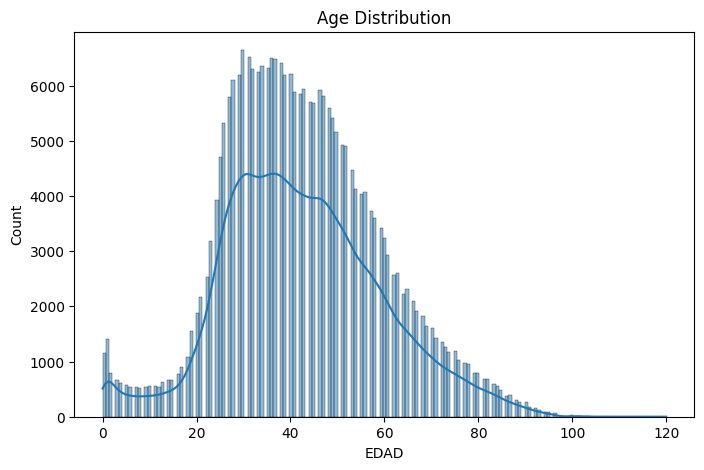

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['EDAD'], kde=True)
plt.title("Age Distribution")
plt.show()

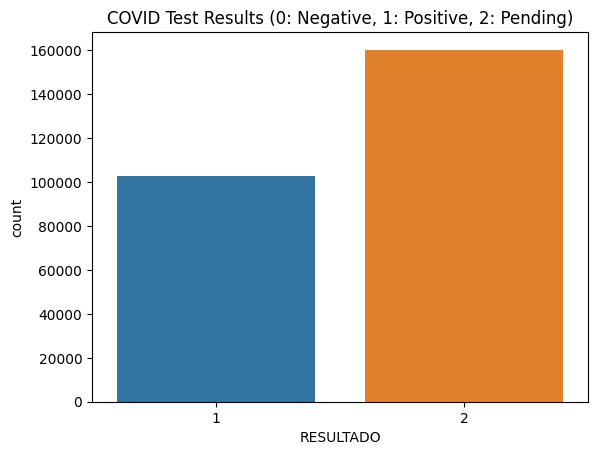

In [10]:
sns.countplot(x='RESULTADO', data=df)
plt.title("COVID Test Results (0: Negative, 1: Positive, 2: Pending)")
plt.show()

In [11]:
X = df.drop(columns=['RESULTADO'])
y = df['RESULTADO']  # 1 = Positive

In [12]:
# Convert to binary classification (1: positive, 0: rest)
y = (y == 1).astype(int)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25906  6074]
 [ 8595 12003]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78     31980
           1       0.66      0.58      0.62     20598

    accuracy                           0.72     52578
   macro avg       0.71      0.70      0.70     52578
weighted avg       0.72      0.72      0.72     52578



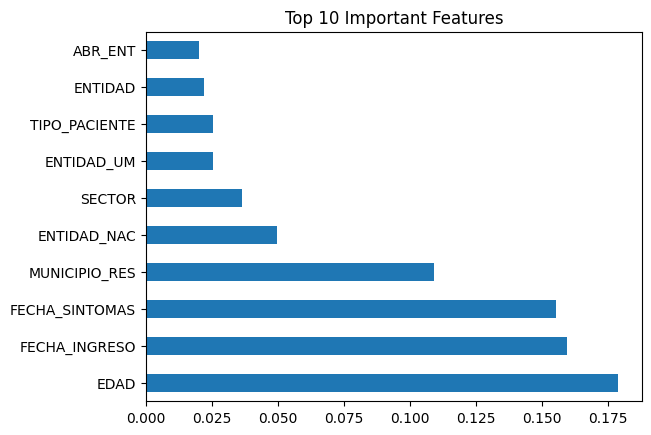

In [16]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()